In [1]:
# pip install pyarrow
# pip install opencv-python==4.11.0.86
# pip install moviepy==1.0.3

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import re
import json
from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_kinematics_utils import get_session_name_from_path, plot_keypoint_confidence_analysis


# code


In [2]:
# # Batch Analysis
# from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_analysis import run_batch_analysis
 

# save_root = "/root/capsule/scratch/session_analysis_in_distribution"
# data_root = Path("/root/capsule/data")

# pred_csv_list = [
#     "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/inference/behavior_716325_2024-05-31_10-31-14/bottom_camera.csv",
#     "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/inference/behavior_717121_2024-06-15_10-00-58/bottom_camera.csv",
#     "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/inference/behavior_717259_2024-06-28_11-17-19/bottom_camera.csv",
#     "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/inference/behavior_717263_2024-07-24_10-40-05/bottom_camera.csv",
#     "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/inference/behavior_751004_2024-12-20_13-26-07/bottom_camera.csv",
#     "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/inference/behavior_751004_2024-12-21_13-28-24/bottom_camera.csv",
#     "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/inference/behavior_751004_2024-12-22_13-09-11/bottom_camera.csv",
#     "/root/capsule/data/BottomViewPylon1-MIB-2025-02-17/inference/behavior_751004_2024-12-23_14-19-57/bottom_camera.csv"
# ]

# run_batch_analysis(pred_csv_list, data_root, save_root)


In [5]:
from pathlib import Path
import glob
import re

# Base directory
data_root = Path("/root/capsule/data")

# List of session names you provided
session_names = [
    "behavior_751769_2025-01-16_11-32-05",
    "behavior_751769_2025-01-17_11-37-39",
    "behavior_751769_2025-01-18_10-15-25",
    "behavior_758017_2025-02-04_11-57-38",
    "behavior_758017_2025-02-05_11-42-34",
    "behavior_758017_2025-02-06_11-26-14",
    "behavior_758017_2025-02-07_14-11-08",
    "behavior_751766_2025-02-11_11-53-38",
    "behavior_751766_2025-02-13_11-31-21",
    "behavior_751766_2025-02-14_11-37-11",
    "behavior_751766_2025-02-15_12-08-11",
    "behavior_751181_2025-02-25_12-12-35",
    "behavior_751181_2025-02-26_11-51-19",
    "behavior_751181_2025-02-27_11-24-47",
    "behavior_754897_2025-03-11_12-07-41",
    "behavior_754897_2025-03-12_12-23-15",
    "behavior_754897_2025-03-13_11-20-42",
    "behavior_754897_2025-03-14_11-28-53",
    "behavior_754897_2025-03-15_11-32-18",
    "behavior_758018_2025-03-19_11-16-44",
    "behavior_758018_2025-03-20_11-53-05",
    "behavior_758018_2025-03-21_11-00-34",
    "behavior_752014_2025-03-25_12-09-20",
    "behavior_752014_2025-03-26_11-18-57",
    "behavior_752014_2025-03-27_12-03-59",
    "behavior_752014_2025-03-28_11-04-59",
    "behavior_761038_2025-04-15_10-25-11",
    "behavior_761038_2025-04-16_10-39-10",
    "behavior_761038_2025-04-17_11-03-16",
    "behavior_761038_2025-04-18_12-37-39",
    "ecephys_763360_2025-04-15_12-16-29",
    "ecephys_763360_2025-04-16_13-29-55",
    "behavior_782394_2025-04-22_10-53-28",
    "behavior_782394_2025-04-23_10-51-17",
    "behavior_782394_2025-04-24_12-07-34",
    "behavior_782394_2025-04-25_11-13-21",
    "behavior_763590_2025-05-01_10-59-18",
    "behavior_763590_2025-05-02_11-07-09",
    "behavior_781166_2025-05-13_14-04-27",
    "behavior_781166_2025-05-14_14-18-28",
    "behavior_781166_2025-05-15_14-20-51",
]

pred_csv_list = []

for session in session_names:
    # Extract base (everything up to YYYY-MM-DD)
    match = re.match(r"^(.*\d{4}-\d{2}-\d{2})", session)
    if not match:
        print(f"⚠️ Could not parse session name: {session}")
        continue
    session_base = match.group(1)

    # Find matching folder in data_root
    search_pattern = str(data_root / f"{session_base}*_videoprocessed_*")
    matches = glob.glob(search_pattern)
    if not matches:
        print(f"⚠️ No match found for {session}")
        continue

    # # If multiple matches, pick the most recent (sorted by name) CHANGED 10/15/2025
    folder = Path(sorted(matches)[-1])
    # csv_path = folder / "pred_outputs" / "video_preds" / "bottom_camera_predictions.csv"
    # if csv_path.exists():
    #     pred_csv_list.append(str(csv_path))
    # else:
    #     print(f"⚠️ Predictions CSV missing for {session}")

    matches = list(folder.glob("pred_outputs/video_preds/*predictions.csv"))
    if not matches:
        print(f"⚠️ No predictions.csv files found for {session}")
    else:
        # If multiple matches, pick the most recent (sorted by name)
        folder = Path(sorted(matches)[-1]).parent.parent.parent  # go back to session root
        csv_path = sorted(matches)[-1]

        if csv_path.exists():
            pred_csv_list.append(str(csv_path))
        else:
            print(f"⚠️ Predictions CSV missing for {session}")

print("pred_csv_list = [")
for path in pred_csv_list:
    print(f'    "{path}",')
print("]")

save_path = Path("/root/capsule/scratch/pred_csv_list.json")
save_path.parent.mkdir(parents=True, exist_ok=True)

with open(save_path, "w") as f:
    json.dump(pred_csv_list, f, indent=2)

print(f"Saved {len(pred_csv_list)} paths to {save_path}")


⚠️ No match found for ecephys_763360_2025-04-15_12-16-29
⚠️ No match found for ecephys_763360_2025-04-16_13-29-55
⚠️ No match found for behavior_781166_2025-05-13_14-04-27
⚠️ No match found for behavior_781166_2025-05-14_14-18-28
pred_csv_list = [
    "/root/capsule/data/behavior_751769_2025-01-16_11-31-52_videoprocessed_2025-10-15_04-40-52/pred_outputs/video_preds/video_predictions.csv",
    "/root/capsule/data/behavior_751769_2025-01-17_11-37-35_videoprocessed_2025-10-16_00-14-19/pred_outputs/video_preds/video_predictions.csv",
    "/root/capsule/data/behavior_751769_2025-01-18_10-15-21_videoprocessed_2025-10-16_00-14-19/pred_outputs/video_preds/video_predictions.csv",
    "/root/capsule/data/behavior_758017_2025-02-04_11-57-33_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv",
    "/root/capsule/data/behavior_758017_2025-02-05_11-42-30_videoprocessed_2025-09-09_18-59-42/pred_outputs/video_preds/bottom_camera_predictions.csv",
    "/root/capsule/data/b


🔹 Starting analysis for: behavior_751769_2025-01-16_11-31-52

=== Generating tongue data for session: behavior_751769_2025-01-16_11-31-52 ===
Predictions CSV: /root/capsule/data/behavior_751769_2025-01-16_11-31-52_videoprocessed_2025-10-15_04-40-52/pred_outputs/video_preds/video_predictions.csv
keypoints extracted: ['nose_tip', 'jaw', 'tongue_tip_right', 'tongue_tip_center', 'tongue_tip_left', 'pointer_finger_r', 'paw_wrist_r', 'pointer_finger_l', 'paw_wrist_l', 'spout_r', 'spout_l']
Loaded keypoints: 11 raw dataframes
Found video CSV: /root/capsule/data/behavior_751769_2025-01-16_11-31-52/behavior-videos/BottomCamera/metadata.csv
Video QC: Frame numbers are sequential with no gaps.
           Behav_Time   Camera_Time  Behav_Time_Diff  Camera_Time_Diff  Time_Diff  Backward_Flag
2160132  2.335540e+06  2.337987e+06        -0.981024             0.002   0.983024           True
2160133  2.335541e+06  2.337987e+06         0.985024             0.002   0.983024          False
  Fixed idx=2160

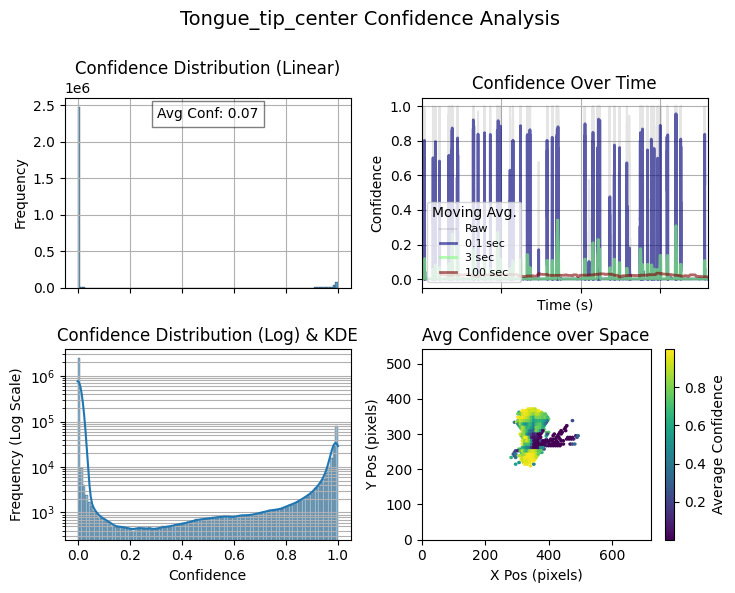

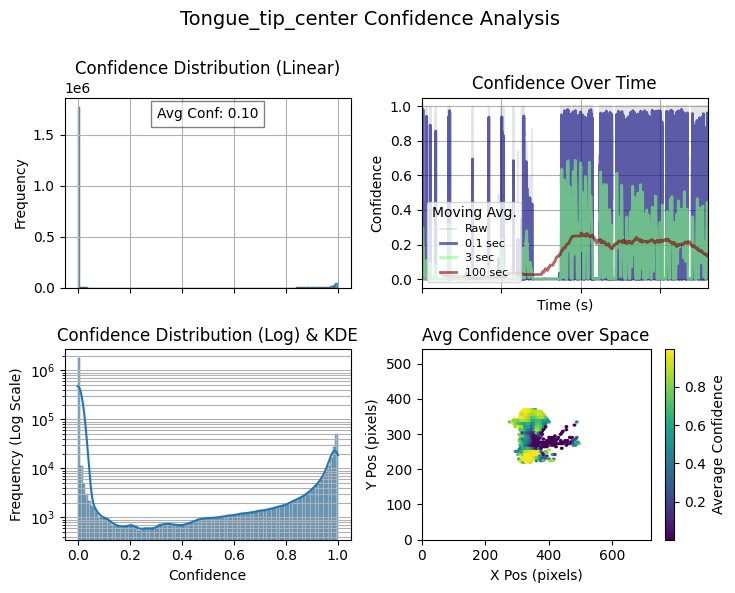

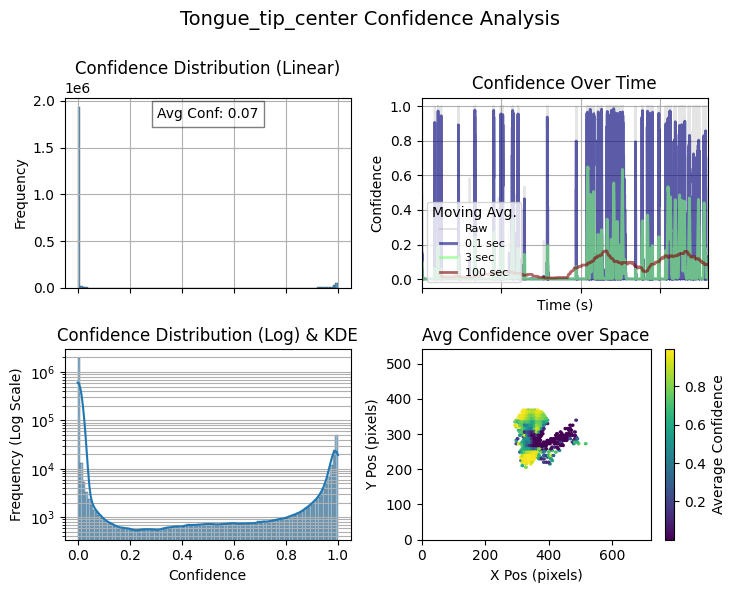

In [6]:
from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_analysis import run_batch_analysis

save_root = "/root/capsule/scratch/session_analysis_out_of_distribution_full"
data_root = Path("/root/capsule/data")

run_batch_analysis(pred_csv_list, data_root, save_root)

In [ ]:
# save_root = "/root/capsule/scratch/session_analysis_out_of_distribution"
# data_root = Path("/root/capsule/data")

# pred_csv_list = [
#     "/root/capsule/data/behavior_751766_2025-02-11_11-53-32_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv",
#     "/root/capsule/data/behavior_754897_2025-03-11_12-07-35_videoprocessed_2025-07-08/pred_outputs/video_preds/bottom_camera_predictions.csv",
#     "/root/capsule/data/behavior_754897_2025-03-13_11-20-39_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv",
#     "/root/capsule/data/behavior_758017_2025-02-04_11-57-33_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv",
#     "/root/capsule/data/behavior_761038_2025-04-15_10-24-57_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv",
#     "/root/capsule/data/behavior_782394_2025-04-24_12-07-31_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv"
# ]

# run_batch_analysis(pred_csv_list, data_root, save_root)



🔹 Starting analysis for: behavior_751766_2025-02-11_11-53-32

=== Generating tongue data for session: behavior_751766_2025-02-11_11-53-32 ===
Predictions CSV: /root/capsule/data/behavior_751766_2025-02-11_11-53-32_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv
keypoints extracted: ['nose_tip', 'jaw', 'tongue_tip_right', 'tongue_tip_center', 'tongue_tip_left', 'pointer_finger_r', 'paw_wrist_r', 'pointer_finger_l', 'paw_wrist_l', 'spout_r', 'spout_l']
Loaded keypoints: 11 raw dataframes
Found video CSV: /root/capsule/data/behavior_751766_2025-02-11_11-53-32/behavior-videos/bottom_camera.csv
Video QC: Frame numbers are sequential with no gaps.
           Behav_Time   Camera_Time  Behav_Time_Diff  Camera_Time_Diff  Time_Diff  Backward_Flag
1569886  4.582049e+06  4.584454e+06        -0.981024          0.001999   0.983023           True
1569887  4.582050e+06  4.584454e+06         0.985024          0.001999   0.983025          False
  Fixed idx=1569886 in 'B

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Clip saved to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/good/trial_108_1136.933s_to_1147.933s.mp4
Saved clip for trial 108 to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/good


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Clip saved to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/good/trial_85_946.899s_to_957.899s.mp4
Saved clip for trial 85 to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/good


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Clip saved to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/good/trial_119_1227.599s_to_1238.599s.mp4
Saved clip for trial 119 to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/good


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Clip saved to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/bad/trial_330_2785.734s_to_2796.734s.mp4
Saved clip for trial 330 to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/bad


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Clip saved to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/bad/trial_14_442.716s_to_453.716s.mp4
Saved clip for trial 14 to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/bad


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Clip saved to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/bad/trial_292_2496.385s_to_2507.385s.mp4
Saved clip for trial 292 to /root/capsule/scratch/refactor_test4/behavior_751766_2025-02-11_11-53-32/example_clips/bad

✅ Batch analysis completed successfully for all sessions!


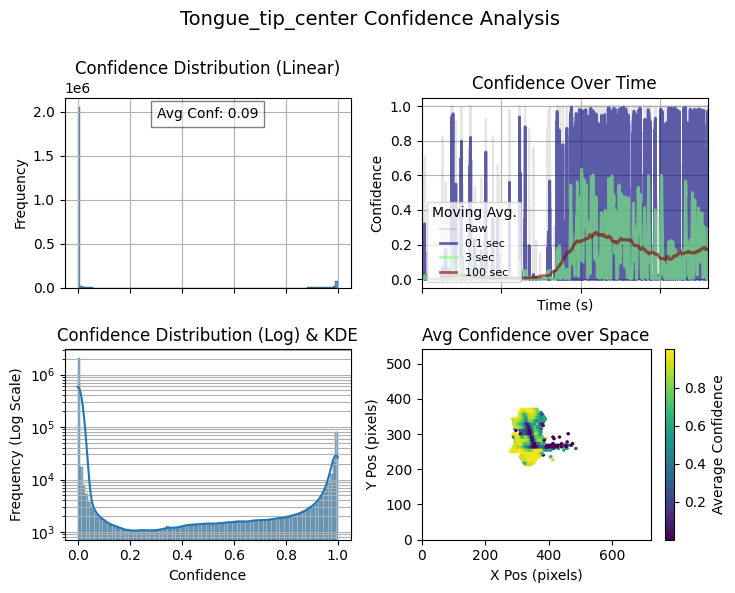

In [3]:
#test single session on batch analysis

save_root = "/root/capsule/scratch/refactor_test4" #update save location as needed
data_root = Path("/root/capsule/data")

pred_csv_list = [
        "/root/capsule/data/behavior_751766_2025-02-11_11-53-32_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv"
]

run_batch_analysis(pred_csv_list, data_root, save_root)

In [ ]:
# # look into individual session for errors when generating dfs


# data_root = Path("/root/capsule/data")

# pred_csv = "/root/capsule/data/behavior_751766_2025-02-11_11-53-32_videoprocessed_2025-07-17/pred_outputs/video_preds/bottom_camera_predictions.csv"
# session_id = get_session_name_from_path(str(pred_csv))

# # ---- 1) Generate DFs ----
# nwb, tongue_kins, tongue_movs, kps_raw, tongue_trials = generate_tongue_dfs(pred_csv, data_root)

In [ ]:
# # testing plotting function

# # Select a trial (first row as example)
# trial_row = nwb.df_trials.iloc[25]

# # Set output path for the plot
# save_path = "example_trial_kinematics.png"

# # Call the plotting function
# plot_kinematic_vs_time(
#     tongue_kins=tongue_kins,
#     trial_row=trial_row,
#     time_col="time_in_session",         # or "session_time" if that's your column
#     value_cols=["x", "y"],              # or any kinematic columns you want to plot
#     save_path=save_path,
#     licks_df=nwb.df_licks,              # pass the licks DataFrame
#     covered_col="nearest_movement_id"   # column indicating coverage
# )

# print(f"Plot saved to {save_path}")

In [ ]:
# #adding videos later

# analysis_root = "/root/capsule/scratch/session_analysis_in_distribution"
# data_root = "/root/capsule/data"

# for session_id in os.listdir(analysis_root):
#     session_path = os.path.join(analysis_root, session_id)
#     inter_dir = os.path.join(session_path, "intermediate_data")
#     # Check if intermediate data exists and has required files
#     required_files = [
#         "tongue_movs.parquet",
#         "tongue_kins.parquet",
#         "nwb_df_licks.parquet",
#         "nwb_df_trials.parquet"
#     ]
#     if not os.path.isdir(inter_dir) or not all(os.path.isfile(os.path.join(inter_dir, f)) for f in required_files):
#         print(f"Skipping {session_id}: missing intermediate data.")
#         continue
#     try:
#         extract_example_clips_for_session(session_id, analysis_root, data_root)
#     except Exception as e:
#         print(f"Error processing {session_id}: {e}")

# helper functions (script version)

In [ ]:
# from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_kinematics_utils import get_trial_level_df

# # def get_trial_level_df(nwb_df_licks, nwb_df_trials):
# #     # Aggregate licks per trial
# #     licks_per_trial = nwb_df_licks.groupby('trial').size().rename('lick_count')
# #     # Aggregate coverage per trial: percent of licks with a movement
# #     covered = nwb_df_licks['nearest_movement_id'].notna().groupby(nwb_df_licks['trial']).mean().rename('coverage_pct')
# #     # Lick count in first 10s of each trial
# #     first_licks = []
# #     for trial, row in nwb_df_trials.set_index('trial').iterrows():
# #         start = row['goCue_start_time_in_session']
# #         end = start + 10
# #         licks_in_window = nwb_df_licks[
# #             (nwb_df_licks['trial'] == trial) &
# #             (nwb_df_licks['timestamps'] >= start) &
# #             (nwb_df_licks['timestamps'] < end)
# #         ]
# #         first_licks.append(len(licks_in_window))
# #     first10s_lick_count = pd.Series(first_licks, index=nwb_df_trials['trial'], name='first10s_lick_count')
# #     # Merge with trial info
# #     trial_df = nwb_df_trials.set_index('trial').join([licks_per_trial, covered, first10s_lick_count])
# #     trial_df['lick_count'] = trial_df['lick_count'].fillna(0).astype(int)
# #     trial_df['coverage_pct'] = trial_df['coverage_pct'] * 100
# #     trial_df['first10s_lick_count'] = trial_df['first10s_lick_count'].fillna(0).astype(int)
# #     return trial_df

In [ ]:
# from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_analysis import generate_tongue_dfs

# # def generate_tongue_dfs(predictions_csv_path: Path, data_root: Path, tolerance=0.01):
# #     """
# #     Runs the full pipeline for one session and returns the NWB object, 
# #     annotated tongue kinematics, and aggregated tongue movements.

# #     Parameters
# #     ----------
# #     predictions_csv_path : Path
# #         Path to the predictions CSV (LP_csv).
# #     data_root : Path
# #         Root folder containing behavior_<…> session subfolders.
# #     tolerance : float, optional
# #         Lick-kinematics matching tolerance (default 0.01).

# #     Returns
# #     -------
# #     tuple : (nwb, tongue_kin, tongue_movs)
# #         nwb: NWBFile object with annotated licks/trials added
# #         tongue_kin: frame-level annotated tongue kinematics (DataFrame)
# #         tongue_movs: movement-level aggregated tongue movements (DataFrame)
# #     """
# #     # === Imports inside so function is self-contained ===
# #     from aind_dynamic_foraging_behavior_video_analysis.kinematics.kinematics_nwb_utils import get_nwb_file
# #     from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_kinematics_utils import (
# #         load_keypoints_from_csv, find_behavior_videos_folder,
# #         integrate_keypoints_with_video_time, mask_keypoint_data,
# #         kinematics_filter, segment_movements_trimnans,
# #         annotate_trials_in_kinematics, annotate_licks_in_kinematics,
# #         assign_movements_to_licks, aggregate_tongue_movements,
# #         add_lick_metadata_to_movements, get_session_name_from_path
# #     )
# #     import aind_dynamic_foraging_data_utils.nwb_utils as nwb_utils
# #     from aind_dynamic_foraging_basic_analysis.licks import annotation

# #     # === 1) Session detection ===
# #     lp_csv = predictions_csv_path
# #     session_id = get_session_name_from_path(str(lp_csv))
# #     print(f"\n=== Generating tongue data for session: {session_id} ===")
# #     print(f"Predictions CSV: {lp_csv}")

# #     # === 2) Load keypoints ===
# #     kps = load_keypoints_from_csv(str(lp_csv))
# #     print(f"Loaded keypoints: {len(kps)} raw dataframes")

# #     # === 3) Locate synced video CSV ===
# #     videos_folder = find_behavior_videos_folder(str(data_root / session_id))
# #     if videos_folder is None:
# #         raise FileNotFoundError(f"Videos folder not found for session {session_id}")
# #     video_csv = Path(videos_folder) / "bottom_camera.csv"
# #     if not video_csv.exists():
# #         raise FileNotFoundError(f"Expected video CSV at {video_csv}")
# #     print(f"Found video CSV: {video_csv}")

# #     # === 4) Sync keypoints to video time ===
# #     kps_trim, _ = integrate_keypoints_with_video_time(str(video_csv), kps)
# #     print(f"Synced keypoints")

# #     # === 5) Tongue movement segmentation ===
# #     tongue_masked = mask_keypoint_data(kps_trim, 'tongue_tip_center', confidence_threshold=0.90)
# #     tongue_filtered = kinematics_filter(tongue_masked, cutoff_freq=50, filter_order=4, filter_kind='cubic')
# #     tongue_seg = segment_movements_trimnans(tongue_filtered, max_dropped_frames=10)
# #     print(f"Segmented {tongue_seg['movement_id'].nunique()} unique movements")

# #     # === 6) Load NWB and annotate ===
# #     nwb = get_nwb_file(session_id)
# #     nwb.df_events = nwb_utils.create_events_df(nwb)
# #     nwb.df_trials = nwb_utils.create_df_trials(nwb)
# #     nwb.df_licks = annotation.annotate_licks(nwb)
# #     print(f"NWB load: {len(nwb.df_trials)} trials, {len(nwb.df_licks)} licks")

# #     tongue_annot = annotate_trials_in_kinematics(tongue_seg, nwb.df_trials)
# #     tongue_kin = annotate_licks_in_kinematics(tongue_annot, nwb.df_licks, tolerance=tolerance)
# #     nwb.df_licks = assign_movements_to_licks(tongue_kin, nwb.df_licks)
# #     print("Annotated kinematics with trials & licks")

# #     # === 7) Aggregate movements ===
# #     tongue_movs = aggregate_tongue_movements(tongue_kin, kps_trim)
# #     tongue_movs = add_lick_metadata_to_movements(
# #         tongue_movs, nwb.df_licks, fields=['cue_response','rewarded','event']
# #     )
# #     print(f"Aggregated movements DF shape: {tongue_movs.shape}")

# #     # === 8) Trial-level DF ===
# #     tongue_trials = get_trial_level_df(nwb.df_licks, nwb.df_trials)
# #     print(f"Aggregated trial-level DF shape: {tongue_trials.shape}")

# #     return nwb, tongue_kin, tongue_movs, kps_trim, tongue_trials


In [ ]:
# from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_kinematics_utils import select_percentile_movements, plot_movement_tiles_scatter

# # def select_percentile_movements(
# #     df: pd.DataFrame,
# #     metric_col: str,
# #     percentiles: list = [0, 0.25, 0.5, 0.75, 1.0]
# # ) -> pd.DataFrame:
# #     """
# #     Return movement_ids and corresponding metric values at specified percentiles.

# #     Parameters
# #     ----------
# #     df : pd.DataFrame
# #         Must contain 'movement_id' and the metric column.
# #     metric_col : str
# #         Name of the numeric column to sort and index into.
# #     percentiles : list of float
# #         Values between 0 and 1 for desired percentiles.

# #     Returns
# #     -------
# #     pd.DataFrame
# #         Columns: ['movement_id', metric_col, 'percentile']
# #     """
# #     if metric_col not in df.columns:
# #         raise ValueError(f"Column '{metric_col}' not found")
# #     series = df[['movement_id', metric_col]].dropna()
# #     if not pd.api.types.is_numeric_dtype(series[metric_col]):
# #         raise ValueError(f"Column '{metric_col}' must be numeric")
# #     if any(p < 0 or p > 1 for p in percentiles):
# #         raise ValueError("Percentiles must be in [0, 1]")

# #     sorted_df = series.sort_values(metric_col).reset_index(drop=True)
# #     N = len(sorted_df)
# #     if N == 0:
# #         return pd.DataFrame(columns=['movement_id', metric_col, 'percentile'])

# #     rows = []
# #     for p in percentiles:
# #         idx = int(round(p * (N - 1)))
# #         rows.append({
# #             'movement_id': int(sorted_df.loc[idx, 'movement_id']),
# #             metric_col: sorted_df.loc[idx, metric_col],
# #             'percentile': p
# #         })

# #     return pd.DataFrame(rows)

# # def plot_movement_tiles_scatter(
# #     tongue_segmented: pd.DataFrame,
# #     movement_ids: list,
# #     x_col: str,
# #     y_col: str,
# #     labels: list = None,
# #     color: str = 'gray',
# #     s: int = 5,
# #     title: str = None,
# #     return_fig=False
# # ):
# #     """
# #     Plot scatter of any two kinematic columns for a given list of movement_ids.

# #     Parameters
# #     ----------
# #     tongue_segmented : pd.DataFrame
# #         Frame-level data with at least 'movement_id', x_col, y_col.
# #     movement_ids : list
# #         Movement IDs to plot (one subplot per movement).
# #     x_col : str
# #         Column in tongue_segmented to plot on x-axis.
# #     y_col : str
# #         Column in tongue_segmented to plot on y-axis.
# #     labels : list, optional
# #         List of strings or values to annotate each subplot (same length as movement_ids).
# #     color : str
# #         Point color for scatter.
# #     s : int
# #         Point size for scatter.
# #     title : str
# #         Title of figure
# #     """
# #     n = len(movement_ids)
# #     fig, axes = plt.subplots(1, n, figsize=(n * 2, 2), sharex=True, sharey=True)
# #     if n == 1:
# #         axes = [axes]

# #     # Global axis limits
# #     all_x, all_y = [], []
# #     for mid in movement_ids:
# #         df = tongue_segmented[tongue_segmented['movement_id'] == mid]
# #         df = df[[x_col, y_col]].dropna()
# #         all_x.extend(df[x_col])
# #         all_y.extend(df[y_col])
# #     if not all_x:
# #         raise RuntimeError("No valid movements found to plot.")
# #     xlim = (min(all_x), max(all_x))
# #     ylim = (min(all_y), max(all_y))

# #     for i, (ax, mid) in enumerate(zip(axes, movement_ids)):
# #         df = tongue_segmented[tongue_segmented['movement_id'] == mid]
# #         df = df[[x_col, y_col]].dropna()

# #         if len(df) < 1:
# #             ax.scatter([0], [0], s=10, color='black')
# #         else:
# #             ax.scatter(df[x_col], df[y_col], s=s, color=color)

# #         ax.set_xlim(xlim)
# #         ax.set_ylim(ylim)
# #         ax.set_xlabel(x_col, fontsize=7)
# #         if ax == axes[0]:
# #             ax.set_ylabel(y_col, fontsize=7)

# #         if labels is not None:
# #             ax.set_title(str(labels[i]), fontsize=8)
    
# #     if title:
# #         plt.suptitle(title, fontsize=10)
# #     else:
# #         plt.suptitle(f"{y_col} vs {x_col}", fontsize=10)
    
# #     # plt.suptitle(f"{y_col} vs {x_col}", fontsize=10)
# #     plt.tight_layout()
# #     if return_fig:
# #         return fig
# #     else:
# #         plt.show()
    


In [ ]:
# from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_analysis import analyze_tongue_movement_quality

# # def analyze_tongue_movement_quality(
# #     kps_raw: dict,
# #     tongue_kins: pd.DataFrame,
# #     tongue_movs: pd.DataFrame,
# #     tongue_trials: pd.DataFrame,  # <-- new
# #     nwb,
# #     save_dir: str,
# #     percentiles: list = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0],
# #     pred_csv=None 
# # ):

# #     """
# #     Analyze and visualize tongue movement quality for a single session.

# #     Saves figures and key summary stats in a session-specific folder.

# #     Parameters
# #     ----------
# #     tongue_kins : pd.DataFrame
# #         Frame-level kinematics data.
# #     tongue_movs : pd.DataFrame
# #         Movement-level kinematics data (one row per movement).
# #     nwb : NWB object with df_licks.
# #     pred_csv : str
# #         Path to the prediction CSV (used to infer session name).
# #     save_dir : str
# #         Directory where results will be saved.
# #     percentiles : list
# #         Percentiles to sample for movement quality plots.
# #     """

# #     # ----------------
# #     # Setup & Folders
# #     # ----------------
# #     os.makedirs(save_dir, exist_ok=True)
# #     session_id = os.path.basename(save_dir)

# #     print(f"Analyzing session: {session_id}")
    
# #     # ----------------
# #     # Confidence figure
# #     # ----------------
# #     keypt = 'tongue_tip_center'  # Example, can be parameterized in wrapper
# #     plot_keypoint_confidence_analysis(
# #         keypoint_dfs=kps_raw,
# #         keypt=keypt,
# #         save_dir=save_dir,
# #         save_figures=True
# #         )
        
# #     # ----------------
# #     # Lick Coverage from trial-level DF
# #     # ----------------
# #     total_licks = tongue_trials['lick_count'].sum()
# #     with_mov = (tongue_trials['coverage_pct'] * tongue_trials['lick_count'] / 100).sum()
# #     coverage_pct = 100 * with_mov / total_licks if total_licks else np.nan

# #     lick_movs = tongue_movs[tongue_movs['has_lick']]
# #     lick_times = nwb.df_licks['timestamps']
# #     has_mov = nwb.df_licks['nearest_movement_id'].notna()
# #     covered_times = lick_times[has_mov]
# #     missed_times = lick_times[~has_mov]

# #     # ----------------
# #     # Lick Coverage Figure
# #     # ----------------
# #     fig = plt.figure(constrained_layout=True, figsize=(14, 8))
# #     parent_gs = fig.add_gridspec(2, 1, height_ratios=[1, 1])
# #     gs_top = parent_gs[0].subgridspec(1, 3, width_ratios=[0.5, 6, 3])
# #     gs_bottom = parent_gs[1].subgridspec(1, 3)

# #     ax_cov = fig.add_subplot(gs_top[0, 0])
# #     ax_raster = fig.add_subplot(gs_top[0, 1])
# #     ax_scat = fig.add_subplot(gs_top[0, 2])
# #     ax_h0 = fig.add_subplot(gs_bottom[0, 0])
# #     ax_h1 = fig.add_subplot(gs_bottom[0, 1])
# #     ax_h2 = fig.add_subplot(gs_bottom[0, 2])

# #     # --- Coverage Bar ---
# #     n_missed = total_licks - with_mov
# #     ax_cov.bar(0, coverage_pct, color='green', label=f'Covered (n={with_mov})')
# #     ax_cov.bar(0, 100 - coverage_pct, bottom=coverage_pct,
# #                color='red', label=f'Missed (n={n_missed})')
# #     ax_cov.set_ylim(0, 100)
# #     ax_cov.set_xticks([])
# #     ax_cov.set_title("Lick Coverage (%)", fontsize=10)
# #     ax_cov.legend(fontsize=7, loc='lower center')

# #     # --- Raster ---
# #     ax_raster.eventplot(
# #         [covered_times, missed_times],
# #         lineoffsets=[1, 0], linelengths=0.8,
# #         colors=['green', 'red']
# #     )
# #     ax_raster.set_yticks([1, 0])
# #     ax_raster.set_yticklabels(['Covered', 'Missed'])
# #     ax_raster.set_xlabel('Time in session (s)')
# #     ax_raster.set_title('Lick coverage over session')

# #     # --- Scatter ---
# #     ax_scat.scatter(lick_movs['duration'], lick_movs['dropped_frames_pct'],
# #                     alpha=0.05, edgecolor='k')
# #     ax_scat.set_xlabel('Duration (s)')
# #     ax_scat.set_ylabel('Dropped Frame %')
# #     ax_scat.set_title('Duration vs Drop%')

# #     # --- Histograms ---
# #     ax_h0.hist(lick_movs['n_datapoints'], bins=30)
# #     ax_h0.set(title='Datapoints')
# #     ax_h1.hist(lick_movs['duration'], bins=30)
# #     ax_h1.set(title='Duration')
# #     ax_h2.hist(lick_movs['dropped_frames_pct'], bins=30)
# #     ax_h2.set(title='Dropped %')

# #     plt.suptitle(f'{session_id}', y=1.02)
# #     fig.savefig(os.path.join(save_dir, "lick_coverage_summary.png"), dpi=150)
# #     plt.close(fig)

# #     # ----------------
# #     # Movement Percentile Plots
# #     # ----------------
# #     tongue_kins['time_in_movement'] = (
# #         tongue_kins['time'] -
# #         tongue_kins.groupby('movement_id')['time'].transform('first')
# #     )

# #     percentile_results = {}
# #     for metric_col in ['dropped_frames_n', 'duration']:
# #         sel = select_percentile_movements(tongue_movs, metric_col=metric_col, percentiles=percentiles)
# #         labels = [f"{int(p*100)}%ile: {val:.2f}" 
# #                   for p, val in zip(sel['percentile'], sel[metric_col])]
# #         percentile_results[metric_col] = dict(zip(sel['percentile'], sel[metric_col]))


# #         fig = plot_movement_tiles_scatter(
# #             tongue_segmented=tongue_kins,
# #             movement_ids=sel['movement_id'].tolist(),
# #             x_col='time_in_movement',
# #             y_col='x',
# #             labels=labels,
# #             color='gray',
# #             title=metric_col,
# #             return_fig=True
# #         )
# #         fig.savefig(os.path.join(save_dir, f"{metric_col}_tiles.png"), dpi=150)
# #         plt.close(fig)

# #     # ----------------
# #     # Save Everything to JSON
# #     # ----------------
# #     results_dict = {
# #         "session_id": os.path.basename(save_dir),
# #         "pred_csv": str(pred_csv) if pred_csv else None,
# #         "total_licks": int(total_licks),
# #         "licks_with_movement": int(with_mov),
# #         "coverage_pct": float(coverage_pct),
# #         "percentiles": percentile_results
# #     }

# #     with open(os.path.join(save_dir, "tongue_quality_stats.json"), "w") as f:
# #         json.dump(results_dict, f, indent=2)

# #     print(f"✅ Finished analysis for {session_id}. Results saved to {save_dir}")



In [ ]:
# from aind_dynamic_foraging_behavior_video_analysis.kinematics.tongue_analysis import run_batch_analysis
 
# # def run_batch_analysis(
# #     pred_csv_list, 
# #     data_root, 
# #     save_root, 
# #     percentiles=None, 
# #     extract_clips=True  
# # ):
# #     """
# #     Run analysis for multiple sessions in batch.

# #     Parameters
# #     ----------
# #     pred_csv_list : list of str or Path
# #         List of prediction CSV paths (one per session).
# #     data_root : str or Path
# #         Root folder where behavior_<...> session folders live.
# #     save_root : str or Path
# #         Root folder to save all analysis outputs.
# #     percentiles : list, optional
# #         Percentiles for movement quality plots (default: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]).
# #     extract_clips : bool, optional
# #         Whether to extract example video clips for each session (default: True).
# #     """
# #     percentiles = percentiles or [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
# #     save_root = Path(save_root)
# #     save_root.mkdir(parents=True, exist_ok=True)

# #     error_log = []

# #     for pred_csv in pred_csv_list:
# #         pred_csv = Path(pred_csv)
# #         session_id = get_session_name_from_path(str(pred_csv))

# #         print(f"\n🔹 Starting analysis for: {session_id}")
# #         session_save_dir = os.path.join(save_root, session_id)
# #         os.makedirs(session_save_dir, exist_ok=True)

# #         try:
# #             # ---- 1) Generate DFs ----
# #             nwb, tongue_kins, tongue_movs, kps_raw, tongue_trials = generate_tongue_dfs(pred_csv, data_root)

# #             # ---- 1a) Save intermediate data ----
# #             intermediate_folder = os.path.join(session_save_dir, "intermediate_data")
# #             os.makedirs(intermediate_folder, exist_ok=True)

# #             # Save tongue_kins and tongue_movs
# #             tongue_kins.to_parquet(os.path.join(intermediate_folder, "tongue_kins.parquet"))
# #             tongue_movs.to_parquet(os.path.join(intermediate_folder, "tongue_movs.parquet"))
# #             tongue_trials.to_parquet(os.path.join(intermediate_folder, "tongue_trials.parquet"))

# #             # Save each df in kps_raw dict
# #             for key, df in kps_raw.items():
# #                 df.to_parquet(os.path.join(intermediate_folder, f"kps_raw_{key}.parquet"))

# #             # Save selected NWB dfs
# #             nwb.df_licks.to_parquet(os.path.join(intermediate_folder, "nwb_df_licks.parquet"))
# #             nwb.df_trials.to_parquet(os.path.join(intermediate_folder, "nwb_df_trials.parquet"))
# #             nwb.df_events.to_parquet(os.path.join(intermediate_folder, "nwb_df_events.parquet"))

# #             # ---- 2) Run analysis ----
# #             analyze_tongue_movement_quality(
# #                 kps_raw=kps_raw,
# #                 tongue_kins=tongue_kins,
# #                 tongue_movs=tongue_movs,
# #                 tongue_trials=tongue_trials,
# #                 nwb=nwb,
# #                 save_dir=session_save_dir,
# #                 percentiles=percentiles,
# #                 pred_csv=pred_csv
# #             )

# #             # ---- 3) Optionally extract example clips ----
# #             if extract_clips:
# #                 try:
# #                     extract_example_clips_for_session(
# #                         session_id, 
# #                         save_root,  # analysis_root
# #                         data_root
# #                     )
# #                 except Exception as e:
# #                     print(f"Warning: Could not extract clips for {session_id}: {e}")

# #         except Exception as e:
# #             error_msg = f"❌ Error in {session_id}: {repr(e)}"
# #             print(error_msg)
# #             error_log.append(error_msg)
# #             continue  # Move to the next session

# #     # ---- Print & Save Error Log ----
# #     if error_log:
# #         log_file = save_root / "batch_error_log.txt"
# #         with open(log_file, "w") as f:
# #             f.write("\n".join(error_log))
# #         print(f"\n⚠️ Completed with errors. See log: {log_file}")
# #     else:
# #         print("\n✅ Batch analysis completed successfully for all sessions!")

In [ ]:

# from aind_dynamic_foraging_behavior_video_analysis.kinematics.video_clip_utils import (find_labeled_video, get_video_time, extract_trial_clip)

# # from aind_dynamic_foraging_behavior_video_analysis.kinematics.video_clip_utils import extract_clips_ffmpeg_after_reencode

# # def find_labeled_video(session_id, data_root):
# #     # Find the labeled video file for a session_id, searching for any folder that starts with session_id
# #     data_root = Path(data_root)
# #     for subdir in data_root.glob(f"{session_id}*"):
# #         candidate = subdir / "pred_outputs" / "video_preds" / "labeled_videos" / "bottom_camera_labeled.mp4"
# #         if candidate.exists():
# #             return str(candidate)
# #     raise FileNotFoundError(f"Labeled video not found for {session_id}")

# # def get_video_time(session_time, tongue_kins):
# #     # Find offset between session time and video time using first row
# #     offset = tongue_kins.iloc[0]['time'] - tongue_kins.iloc[0]['time_in_session']
# #     return session_time + offset

# # def extract_trial_clip(
# #     session_id, trial_row, tongue_kins, video_path, save_dir,
# #     clip_duration_s=10.0, pad_s=0.5
# # ):
# #     start = trial_row['goCue_start_time_in_session']
# #     end = start + clip_duration_s

# #     # Convert to video time
# #     video_start = get_video_time(start, tongue_kins) - pad_s
# #     video_end = get_video_time(end, tongue_kins) + pad_s
# #     clip_length = video_end - video_start

# #     # Filename
# #     trial_num = trial_row.name if hasattr(trial_row, 'name') else trial_row['trial']
# #     filename_stem = f"trial_{trial_num}"

# #     extract_clips_ffmpeg_after_reencode(
# #         video_path, [video_start], clip_length, save_dir, filename_stems=[filename_stem]
# #     )
# #     print(f"Saved clip for trial {trial_num} to {save_dir}")

    
# # def extract_example_clips_for_session(session_id, analysis_root, data_root):
# #     # Load data
# #     inter_dir = Path(analysis_root) / session_id / "intermediate_data"
# #     tongue_movs = pd.read_parquet(inter_dir / "tongue_movs.parquet")
# #     tongue_kins = pd.read_parquet(inter_dir / "tongue_kins.parquet")
# #     nwb_df_licks = pd.read_parquet(inter_dir / "nwb_df_licks.parquet")
# #     nwb_df_trials = pd.read_parquet(inter_dir / "nwb_df_trials.parquet")
# #     # Get trial-level stats
# #     trial_df = get_trial_level_df(nwb_df_licks, nwb_df_trials)
    
# #     # Only consider trials with at least 5 licks
# #     trial_df = trial_df[trial_df['first10s_lick_count'] >= 5]

# #     # # Find trial with highest and lowest coverage (among those with high lick count)
# #     # Top 3 trials by coverage
# #     top3 = trial_df.sort_values(['coverage_pct', 'lick_count'], ascending=[False, False]).head(3)
# #     # Bottom 3 trials by coverage
# #     bottom3 = trial_df.sort_values(['coverage_pct', 'lick_count'], ascending=[True, False]).head(3)

# #     # Output dirs
# #     good_dir = Path(analysis_root) / session_id / "example_clips" / "good"
# #     bad_dir = Path(analysis_root) / session_id / "example_clips" / "bad"
# #     good_dir.mkdir(exist_ok=True, parents=True)
# #     bad_dir.mkdir(exist_ok=True, parents=True)

# #     # Try to find video, but allow plotting if not found
# #     try:
# #         video_path = find_labeled_video(session_id, data_root)
# #         video_found = True
# #     except FileNotFoundError:
# #         print(f"Warning: No labeled video found for {session_id}. Skipping video extraction, will plot only.")
# #         video_found = False

# #     for _, trial_row in top3.iterrows():
# #         if video_found:
# #             extract_trial_clip(session_id, trial_row, tongue_kins, video_path, good_dir,
# #                                clip_duration_s=10, pad_s=0.5)
# #         fig_path = good_dir / f"Trial{trial_row.name}_xy_vs_time.png"
# #         plot_kinematic_vs_time(tongue_kins, trial_row, time_col="time_in_session", value_cols=['x', 'y'],
# #                                save_path=fig_path, licks_df=nwb_df_licks, covered_col="nearest_movement_id", pad_s=0.5)

# #     for _, trial_row in bottom3.iterrows():
# #         if video_found:
# #             extract_trial_clip(session_id, trial_row, tongue_kins, video_path, bad_dir,
# #                                clip_duration_s=10, pad_s=0.5)
# #         fig_path = bad_dir / f"Trial{trial_row.name}_xy_vs_time.png"
# #         plot_kinematic_vs_time(tongue_kins, trial_row, time_col="time_in_session", value_cols=['x', 'y'],
# #                                save_path=fig_path, licks_df=nwb_df_licks, covered_col="nearest_movement_id", pad_s=0.5)


# # def plot_kinematic_vs_time(
# #     tongue_kins, trial_row, time_col, value_cols, save_path,
# #     clip_duration_s=None, pad_s=0.5, axes=None, title_prefix="",
# #     licks_df=None,
# #     covered_col='nearest_movement_id'
# # ):
# #     """
# #     Plots one or more kinematic parameters vs. time in stacked subplots.
# #     Optionally overlays vertical lines for lick times (green=covered, red=missed).

# #     Parameters:
# #         tongue_kins (pd.DataFrame): Kinematics dataframe.
# #         trial_row (pd.Series): Row from trials dataframe.
# #         time_col (str): Name of the time column (e.g., 'session_time').
# #         value_cols (list of str): List of kinematic columns to plot.
# #         save_path (str or Path): Where to save the figure.
# #         clip_duration_s (float or None): If set, use start+clip_duration_s for end, else use bonsai_stop_time_in_session.
# #         pad_s (float): Padding before/after clip window.
# #         axes (list of plt.Axes): Optional list of externally created axes.
# #         title_prefix (str): Optional string prefix for title.
# #         licks_df (pd.DataFrame): DataFrame of licks (must have 'timestamps', 'trial', and coverage col).
# #         covered_col (str): Column in licks_df indicating coverage (notna means covered).
# #     """
# #     start = trial_row['goCue_start_time_in_session']
# #     if clip_duration_s is not None:
# #         end = start + clip_duration_s
# #     else:
# #         end = trial_row['bonsai_stop_time_in_session']

# #     window_start = start - pad_s
# #     window_end = end + pad_s

# #     df = tongue_kins[
# #         (tongue_kins[time_col] >= window_start) &
# #         (tongue_kins[time_col] <= window_end)
# #     ]

# #     if axes is None:
# #         fig, axes = plt.subplots(len(value_cols), 1, figsize=(8, 3 * len(value_cols)), sharex=True)
# #         if len(value_cols) == 1:
# #             axes = [axes]  # make iterable if only one plot
# #     else:
# #         fig = axes[0].figure

# #     # For legend handles
# #     covered_handle = None
# #     missed_handle = None

# #     for ax, val_col in zip(axes, value_cols):
# #         ax.scatter(df[time_col], df[val_col], s=5, alpha=0.5, color='gray')
# #         ax.set_ylabel(val_col)
# #         ax.set_xlim(window_start, window_end)

# #     # --- Add vertical lines for licks ---
# #     if licks_df is not None:
# #         trial_num = trial_row.name if 'name' in dir(trial_row) else trial_row['trial']
# #         licks_in_trial = licks_df[licks_df['trial'] == trial_num]
# #         # Filter to window
# #         licks_in_window = licks_in_trial[
# #             (licks_in_trial['timestamps'] >= window_start) &
# #             (licks_in_trial['timestamps'] <= window_end)
# #         ]
# #         # Covered: where covered_col is notna
# #         covered = licks_in_window[licks_in_window[covered_col].notna()]
# #         missed = licks_in_window[licks_in_window[covered_col].isna()]
# #         for t in covered['timestamps']:
# #             for ax in axes:
# #                 covered_handle = ax.axvline(
# #                     t, color='green', linestyle='--', alpha=0.7, linewidth=1, label='Covered lick'
# #                 )
# #         for t in missed['timestamps']:
# #             for ax in axes:
# #                 missed_handle = ax.axvline(
# #                     t, color='red', linestyle='--', alpha=0.7, linewidth=1, label='Missed lick'
# #                 )
# #         # Add legend to the top axis only, avoiding duplicate labels
# #         handles = []
# #         labels = []
# #         if covered_handle is not None:
# #             handles.append(covered_handle)
# #             labels.append('Covered lick')
# #         if missed_handle is not None:
# #             handles.append(missed_handle)
# #             labels.append('Missed lick')
# #         if handles:
# #             axes[0].legend(handles, labels, loc='upper left', fontsize=9)

# #     axes[-1].set_xlabel(f"{time_col} (s)")
# #     axes[0].set_title(f"{title_prefix} Trial {trial_row.name}: {', '.join(value_cols)} vs {time_col}")

# #     fig.tight_layout()
# #     fig.savefig(save_path, dpi=150)
# #     plt.close(fig)

# # # Example usage:
# # # extract_example_clips_for_session("behavior_751004_2024-12-23_14-19-57", "/root/capsule/scratch/session_analysis", "/root/capsule/data")